# WeatherPy
---
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
       
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | gaigeturi
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 7 of Set 1 | zhangye
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | faya-largeau
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | firmat
Processing Record 13 of Set 1 | weyburn
Processing Record 14 of Set 1 | weno
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | inhambane
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | bako
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | grand forks
Processing Record 22 of Set

Processing Record 38 of Set 4 | bolotnoye
Processing Record 39 of Set 4 | taksimo
Processing Record 40 of Set 4 | olonkinbyen
Processing Record 41 of Set 4 | lerwick
Processing Record 42 of Set 4 | havelberg
Processing Record 43 of Set 4 | luanda
Processing Record 44 of Set 4 | beledweyne
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | tofol
Processing Record 47 of Set 4 | san antonio de pale
Processing Record 48 of Set 4 | acton
Processing Record 49 of Set 4 | akobo
Processing Record 0 of Set 5 | dwarka
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | tol'yatti
Processing Record 3 of Set 5 | xiaoweizhai
Processing Record 4 of Set 5 | ceres
Processing Record 5 of Set 5 | chonchi
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | puerto asis
Processing Record 8 of Set 5 | lobujya
Processing Record 9 of Set 5 | titao
Processing Record 10 of Set 5 | awjilah
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of S

Processing Record 31 of Set 8 | mapleton
Processing Record 32 of Set 8 | avlonas
Processing Record 33 of Set 8 | zabol
Processing Record 34 of Set 8 | navasota
Processing Record 35 of Set 8 | fereydun kenar
Processing Record 36 of Set 8 | tanjung selor
City not found. Skipping...
Processing Record 37 of Set 8 | vicuna
Processing Record 38 of Set 8 | hihifo
City not found. Skipping...
Processing Record 39 of Set 8 | girvan
Processing Record 40 of Set 8 | tuskegee
Processing Record 41 of Set 8 | tandil
Processing Record 42 of Set 8 | gorgan
Processing Record 43 of Set 8 | chichiriviche
Processing Record 44 of Set 8 | onguday
Processing Record 45 of Set 8 | adler
Processing Record 46 of Set 8 | ratnagiri
Processing Record 47 of Set 8 | kodiak
Processing Record 48 of Set 8 | dayton
Processing Record 49 of Set 8 | hemsby
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | gvardeysk
Processing Record 2 of Set 9 | miles city
Processing Record 3 of Set 9 | osuna
Processing Rec

Processing Record 22 of Set 12 | karratha
Processing Record 23 of Set 12 | chimbarongo
Processing Record 24 of Set 12 | zhangatas
Processing Record 25 of Set 12 | hilvan
Processing Record 26 of Set 12 | nuku'alofa
Processing Record 27 of Set 12 | virginia
Processing Record 28 of Set 12 | malyye derbety
Processing Record 29 of Set 12 | koryukivka
Processing Record 30 of Set 12 | saint-benoit
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | sinan
Processing Record 33 of Set 12 | usogorsk
Processing Record 34 of Set 12 | archidona
Processing Record 35 of Set 12 | guichon
Processing Record 36 of Set 12 | fremont
Processing Record 37 of Set 12 | bel ombre
Processing Record 38 of Set 12 | kudymkar
Processing Record 39 of Set 12 | qamdo
Processing Record 40 of Set 12 | vorotynets
Processing Record 41 of Set 12 | la'ie
Processing Record 42 of Set 12 | usinsk
Processing Record 43 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 44 of Set 12 | talak

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,55.87,67,99,23.82,SH,2023-06-06 16:16:57
1,acarau,-2.8856,-40.1200,79.59,79,0,11.45,BR,2023-06-06 16:25:38
2,waitangi,-43.9535,-176.5597,51.82,95,100,1.01,NZ,2023-06-06 16:17:08
3,gaigeturi,33.4644,126.3183,59.05,88,0,5.75,KR,2023-06-06 16:25:38
4,yellowknife,62.4560,-114.3525,54.12,94,75,16.11,CA,2023-06-06 16:16:55


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,55.87,67,99,23.82,SH,2023-06-06 16:16:57
1,acarau,-2.8856,-40.1200,79.59,79,0,11.45,BR,2023-06-06 16:25:38
2,waitangi,-43.9535,-176.5597,51.82,95,100,1.01,NZ,2023-06-06 16:17:08
3,gaigeturi,33.4644,126.3183,59.05,88,0,5.75,KR,2023-06-06 16:25:38
4,yellowknife,62.4560,-114.3525,54.12,94,75,16.11,CA,2023-06-06 16:16:55


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

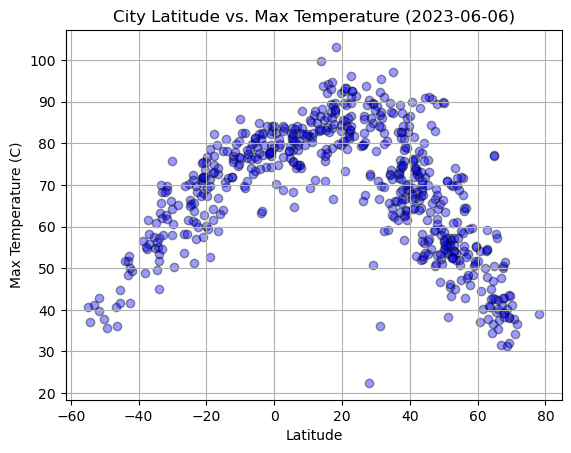

In [45]:
#grab current date for title
date = datetime.today().date()

# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

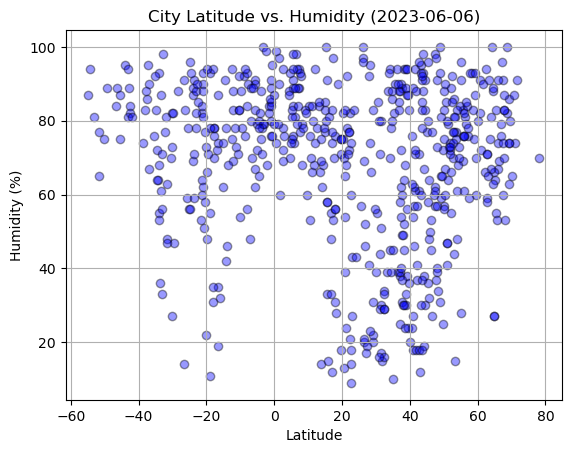

In [48]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

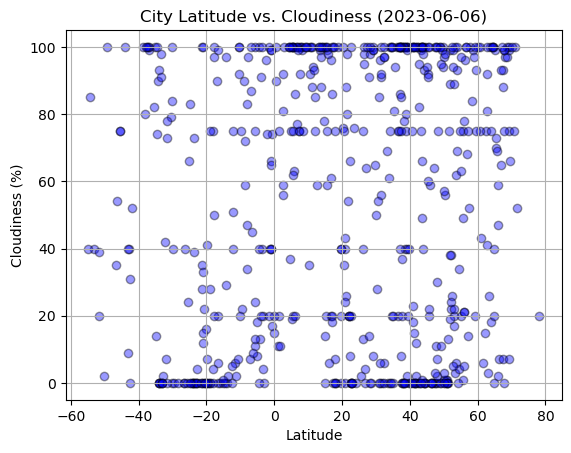

In [50]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

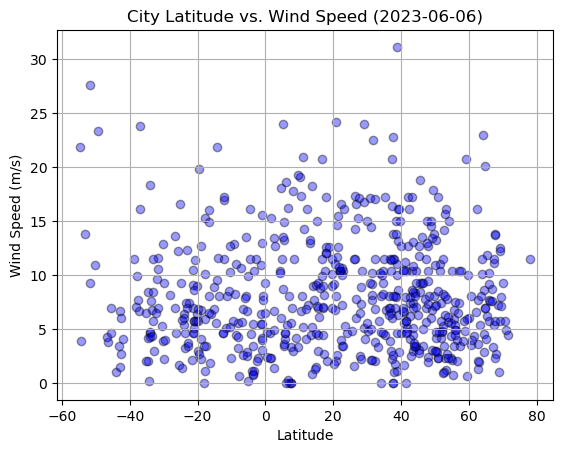

In [51]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [73]:
# Define a function to create Linear Regression plots
def lineregress(x_values, y_values, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress, "r-")
    plt.xlabel("Latitude")
    plt.annotate(line,(x,y),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,gaigeturi,33.4644,126.3183,59.05,88,0,5.75,KR,2023-06-06 16:25:38
4,yellowknife,62.4560,-114.3525,54.12,94,75,16.11,CA,2023-06-06 16:16:55
5,zhangye,38.9342,100.4517,63.97,30,100,1.12,CN,2023-06-06 16:25:39
6,aykhal,66.0000,111.5000,35.49,67,2,7.67,RU,2023-06-06 16:25:39
7,faya-largeau,17.9257,19.1043,89.58,31,7,12.57,TD,2023-06-06 16:25:40


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,55.87,67,99,23.82,SH,2023-06-06 16:16:57
1,acarau,-2.8856,-40.1200,79.59,79,0,11.45,BR,2023-06-06 16:25:38
2,waitangi,-43.9535,-176.5597,51.82,95,100,1.01,NZ,2023-06-06 16:17:08
10,firmat,-33.4594,-61.4832,69.91,87,98,6.80,AR,2023-06-06 16:25:40
15,inhambane,-23.8650,35.3833,72.27,87,0,6.40,MZ,2023-06-06 16:16:58


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5523624220899176


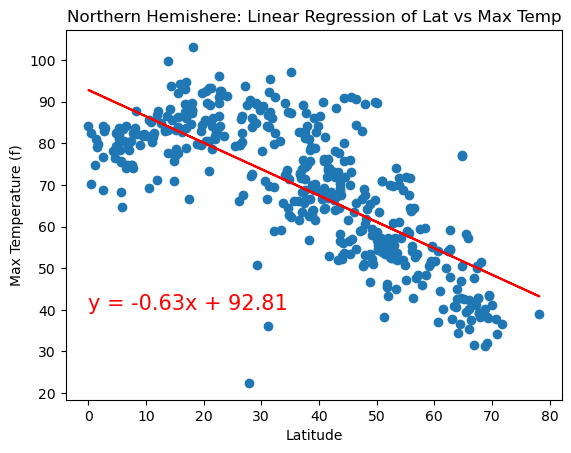

In [79]:
# Linear regression on Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

#put in where you want the line equation to go
x = 0
y = 40

#plot the y label and title
plt.ylabel("Max Temperature (f)")
plt.title("Northern Hemishere: Linear Regression of Lat vs Max Temp")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress1.png")

The r-value is: 0.7540510182633273


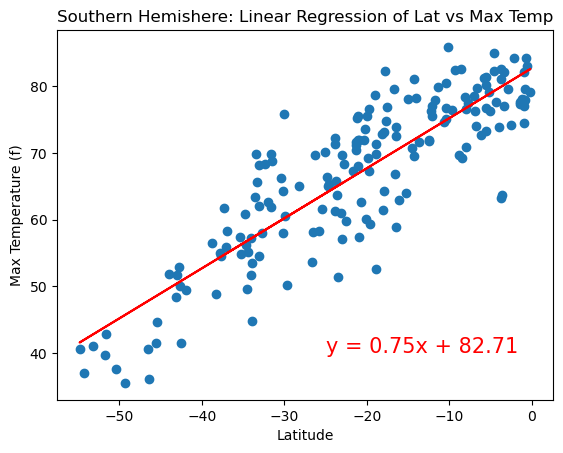

In [80]:
# Linear regression on Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

#put in where you want the line equation to go
x = -25
y = 40

#plot the y label and title
plt.ylabel("Max Temperature (f)")
plt.title("Southern Hemishere: Linear Regression of Lat vs Max Temp")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress2.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00012376880857413715


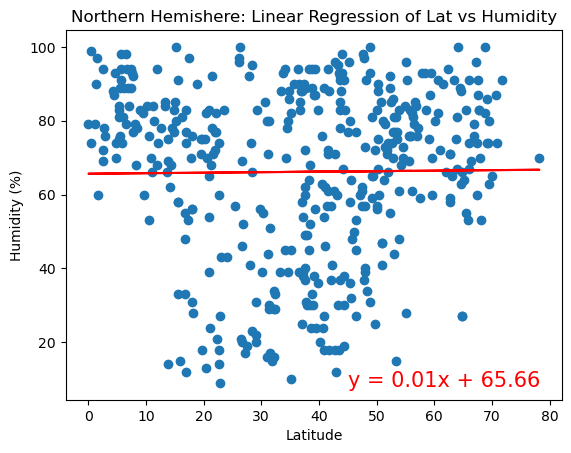

In [85]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

#put in where you want the line equation to go
x = 45
y = 8

#plot the y label and title
plt.ylabel("Humidity (%)")
plt.title("Northern Hemishere: Linear Regression of Lat vs Humidity")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress3.png")

The r-value is: 0.0010341511144652976


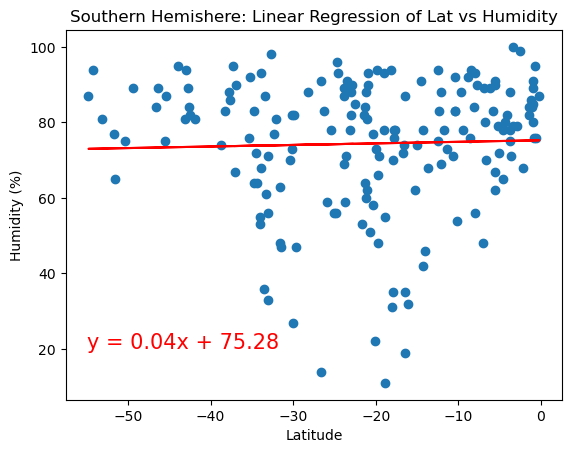

In [107]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

#put in where you want the line equation to go
x = -55
y = 20

#plot the y label and title
plt.ylabel("Humidity (%)")
plt.title("Southern Hemishere: Linear Regression of Lat vs Humidity")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress4.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007470771395429618


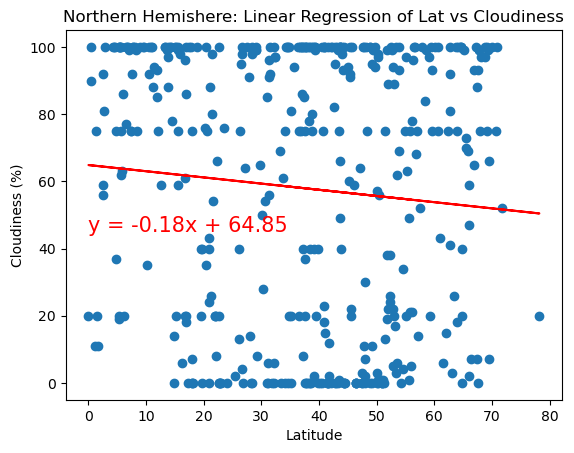

In [93]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

#put in where you want the line equation to go
x = 0
y = 45

#plot the y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemishere: Linear Regression of Lat vs Cloudiness")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress5.png")

The r-value is: 0.0007568426531657219


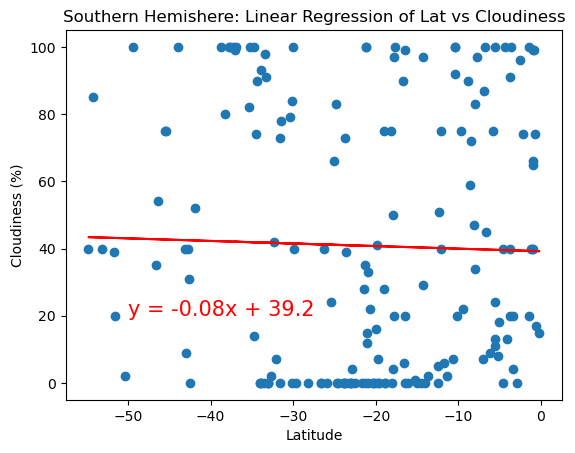

In [95]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

#put in where you want the line equation to go
x = -50
y = 20

#plot the y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemishere: Linear Regression of Lat vs Cloudiness")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010496185731521482


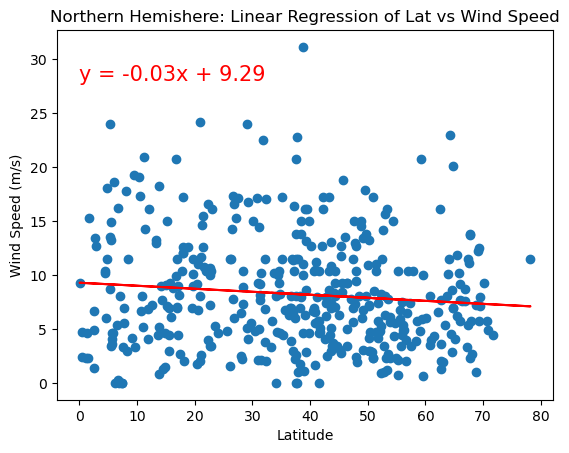

In [98]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

#put in where you want the line equation to go
x = 0
y = 28

#plot the y label and title
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemishere: Linear Regression of Lat vs Wind Speed")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress7.png")

The r-value is: 0.018644393381949884


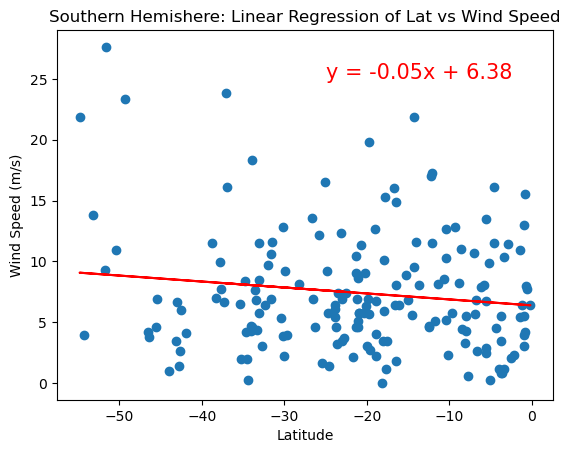

In [102]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

#put in where you want the line equation to go
x = -25
y = 25

#plot the y label and title
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemishere: Linear Regression of Lat vs Wind Speed")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE